# Exploring Classifier Performance For Fault Detection In Complex Electronic System

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Uploading Dataset

In [2]:
dataset=pd.read_csv("PCB.txt")
dataset

,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Short_circuit
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,Open_circuit
3,1,283,333.0,360.166890,3.0,%=0.20,Open_circuit
4,1,283,333.0,359.190662,3.0,%=0.25,Open_circuit
...,...,...,...,...,...,...,...
27275,3,303,333.0,341.109962,12.0,Nominal,Nominal
27276,4,303,333.0,341.112750,12.0,Nominal,Nominal
27277,1,303,333.0,340.764696,12.5,Nominal,Nominal
27278,3,303,333.0,340.786085,12.5,Nominal,Nominal


In [3]:
dataset['Class'].unique()

array(['Short_circuit', 'Nominal', 'Open_circuit', 'Fouling', 'Scaling'],
      dtype=object)

## Dataset Preprocessing

In [4]:
dataset.dropna(inplace=True) 

In [5]:
dataset.isnull().sum()

Supply        0
Current       0
Power         0
Tsupply       0
Wafer_Mdot    0
Condition     0
Class         0
dtype: int64

In [6]:
dataset.head()

,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Short_circuit
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,Open_circuit
3,1,283,333.0,360.166890,3.0,%=0.20,Open_circuit
4,1,283,333.0,359.190662,3.0,%=0.25,Open_circuit


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27280 entries, 0 to 27279
Data columns (total 7 columns):
Supply        27280 non-null int64
Current       27280 non-null int64
Power         27280 non-null float64
Tsupply       27280 non-null float64
Wafer_Mdot    27280 non-null float64
Condition     27280 non-null object
Class         27280 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [8]:
dataset.isnull().sum()

Supply        0
Current       0
Power         0
Tsupply       0
Wafer_Mdot    0
Condition     0
Class         0
dtype: int64

In [9]:
dataset.describe()

,Supply,Current,Power,Tsupply,Wafer_Mdot
count,27280.000000,27280.000000,2.728000e+04,27280.000000,27280.000000
mean,2.500000,293.000000,3.330000e+02,341.973498,7.750000
std,1.118054,6.324671,1.023493e-07,5.743586,2.883193
min,1.000000,283.000000,3.330000e+02,334.612655,3.000000
25%,1.750000,287.000000,3.330000e+02,337.809324,5.375000
50%,2.500000,293.000000,3.330000e+02,340.576111,7.750000
75%,3.250000,299.000000,3.330000e+02,344.361267,10.125000
max,4.000000,303.000000,3.330000e+02,365.298602,12.500000


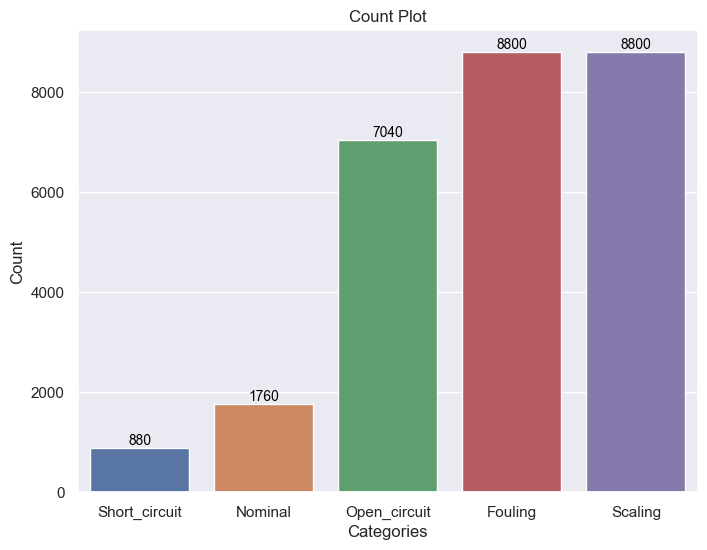

In [10]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.countplot(x='Class', data=dataset)
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

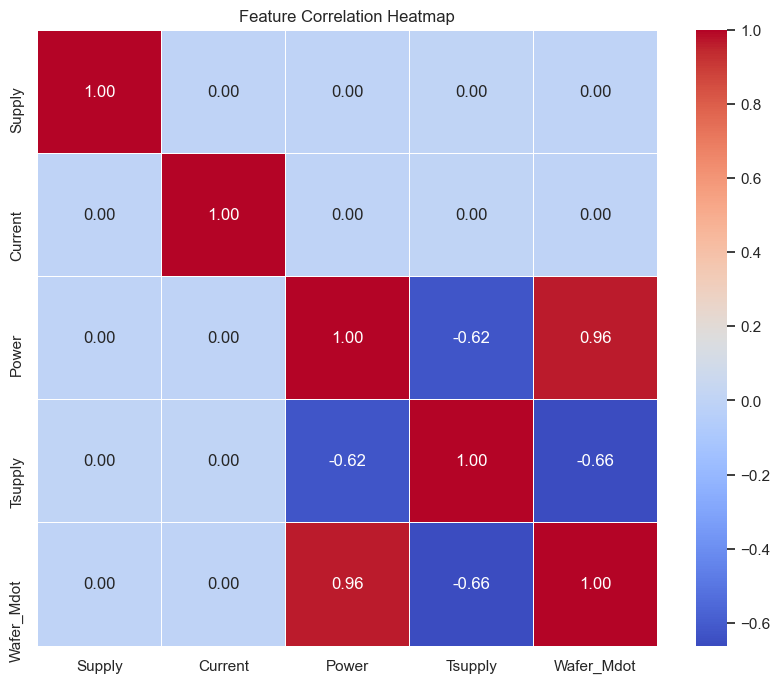

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")

# Show plot
plt.show()

In [12]:
# Converting object type to int type

In [13]:
le= LabelEncoder()
dataset['Class']=  le.fit_transform(dataset['Class'])

In [14]:
dataset['Condition']=le.fit_transform(dataset['Condition'])

In [15]:
dataset.dropna(inplace=True)

In [16]:
#Defining Dependent and independent variables

In [17]:
X=dataset.drop(['Class'],axis=1)
X

,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition
0,1,283,333.0,363.574744,3.0,0
1,1,283,333.0,362.349517,3.0,1
2,1,283,333.0,361.216941,3.0,2
3,1,283,333.0,360.166890,3.0,3
4,1,283,333.0,359.190662,3.0,4
...,...,...,...,...,...,...
27275,3,303,333.0,341.109962,12.0,20
27276,4,303,333.0,341.112750,12.0,20
27277,1,303,333.0,340.764696,12.5,20
27278,3,303,333.0,340.786085,12.5,20


In [18]:
y=dataset['Class']
y

0        4
1        1
2        2
3        2
4        2
        ..
27275    1
27276    1
27277    1
27278    1
27279    1
Name: Class, Length: 27280, dtype: int32

In [19]:
#Datasplitting

In [20]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=77)

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=77)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Using TensorFlow backend.


<AxesSubplot:xlabel='Class', ylabel='count'>

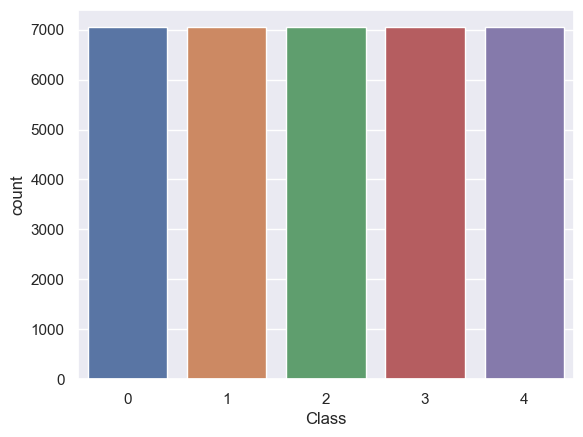

In [22]:
sns.countplot(x=y_train_smote,data=dataset)

In [23]:
lables = ['Short_circuit', 'Nominal', 'Open_circuit', 'Fouling', 'Scaling']

In [24]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []


#function to calculate various metrics such as accuracy, precision etc
def PerformanceMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    print(f"\n{algorithm} Classification Report:\n")
    print(classification_report(testY, predict, target_names=lables))
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = lables, yticklabels = lables, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(lables)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

## Model Building and Training

### KNN Classifier

Model loaded successfully.
knn_classifier Accuracy    : 89.95601173020528
knn_classifier Precision   : 59.47488584474886
knn_classifier Recall      : 54.04217367609927
knn_classifier FSCORE      : 56.465770991027654

knn_classifier Classification Report:

               precision    recall  f1-score   support

Short_circuit       0.97      1.00      0.99      1711
      Nominal       0.00      0.00      0.00         0
 Open_circuit       1.00      0.79      0.88      1802
      Fouling       1.00      0.92      0.96      1943
      Scaling       0.00      0.00      0.00         0

     accuracy                           0.90      5456
    macro avg       0.59      0.54      0.56      5456
 weighted avg       0.99      0.90      0.94      5456



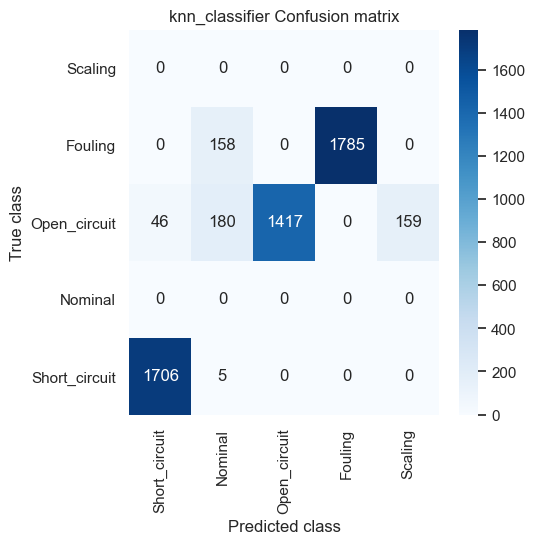

In [25]:
# File path to save the model
model_filename = 'knn_classifier_model.pkl'

# Check if the model exists
if os.path.exists(model_filename):
    # Load the existing model
    model = joblib.load(model_filename)
    print("Model loaded successfully.")

    # Predict using the loaded model
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    PerformanceMetrics('knn_classifier', y_test, y_pred)
    
else:
    # Train a new KNN Classifier model
    model = KNeighborsClassifier(n_neighbors=678)
    model.fit(X_train, y_train)
    print("Model trained successfully.")

    # Save the trained model to a file
    joblib.dump(model, model_filename)
    print("Model saved successfully.")

    # Predict using the trained model
    y_pred = model.predict(X_test)

    # Calculate and print metrics
    PerformanceMetrics('knn_classifier', y_test, y_pred)

### Decision Tree Classifier

Model loaded successfully.
decision_tree_classifier Accuracy    : 100.0
decision_tree_classifier Precision   : 100.0
decision_tree_classifier Recall      : 100.0
decision_tree_classifier FSCORE      : 100.0

decision_tree_classifier Classification Report:

               precision    recall  f1-score   support

Short_circuit       1.00      1.00      1.00      1752
      Nominal       1.00      1.00      1.00       343
 Open_circuit       1.00      1.00      1.00      1417
      Fouling       1.00      1.00      1.00      1785
      Scaling       1.00      1.00      1.00       159

     accuracy                           1.00      5456
    macro avg       1.00      1.00      1.00      5456
 weighted avg       1.00      1.00      1.00      5456



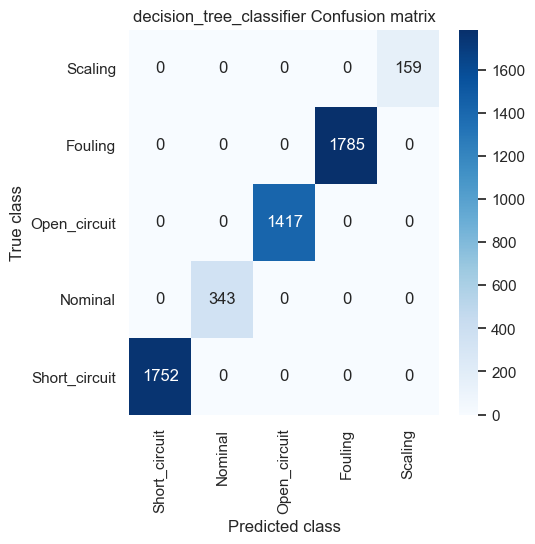

In [26]:
from sklearn.tree import DecisionTreeClassifier
import joblib
import os

# File path to save the model
model_filename = 'decision_tree_classifier_model.pkl'

# Check if the model exists
if os.path.exists(model_filename):
    # Load the existing model
    model11 = joblib.load(model_filename)
    print("Model loaded successfully.")

    # Predict using the loaded model
    y_pred = model11.predict(X_test)

    # Calculate1 and print metrics
    PerformanceMetrics('decision_tree_classifier', y_test, y_pred)

else:
    # Train a new Decision Tree Classifier model
    model11 = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=77)
    model11.fit(X_train, y_train)
    print("Model trained successfully.")

    # Save the trained model to a file
    joblib.dump(model11, model_filename)
    print("Model saved successfully.")

    # Predict using the trained model
    y_pred = model11.predict(X_test)

    # Calculate and print metrics
    PerformanceMetrics('decision_tree_classifier', y_test, y_pred)


## New Sample Testdata

In [27]:
test = pd.read_csv('testdata.csv')
test

,Unnamed: 0,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition,Class
0,20925,2,293,333.0,336.427306,9.0,26,3
1,713,1,289,333.0,342.667967,8.5,3,2
2,14438,3,295,333.0,340.493638,4.5,18,0
3,4147,2,301,333.0,340.207573,10.0,7,2
4,24662,4,287,333.0,341.452885,6.0,23,3
5,23231,3,295,333.0,347.396886,4.5,22,3
6,15599,4,283,333.0,335.490883,12.5,19,0
7,24506,4,285,333.0,336.399747,8.0,27,3
8,24198,3,303,333.0,334.778297,12.5,29,3
9,8544,4,301,333.0,340.989098,10.0,4,2


In [28]:
test = dataset.drop(['Class'],axis=1)
test

,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition
0,1,283,333.0,363.574744,3.0,0
1,1,283,333.0,362.349517,3.0,1
2,1,283,333.0,361.216941,3.0,2
3,1,283,333.0,360.166890,3.0,3
4,1,283,333.0,359.190662,3.0,4
...,...,...,...,...,...,...
27275,3,303,333.0,341.109962,12.0,20
27276,4,303,333.0,341.112750,12.0,20
27277,1,303,333.0,340.764696,12.5,20
27278,3,303,333.0,340.786085,12.5,20


## Decision Tree Classifier Used for Prediction of TestData

In [29]:
pred = model11.predict(test)
pred

array([4, 1, 2, ..., 1, 1, 1])

In [30]:
test['prediction'] =[lables[i] for i in pred]
test

,Supply,Current,Power,Tsupply,Wafer_Mdot,Condition,prediction
0,1,283,333.0,363.574744,3.0,0,Scaling
1,1,283,333.0,362.349517,3.0,1,Nominal
2,1,283,333.0,361.216941,3.0,2,Open_circuit
3,1,283,333.0,360.166890,3.0,3,Open_circuit
4,1,283,333.0,359.190662,3.0,4,Open_circuit
...,...,...,...,...,...,...,...
27275,3,303,333.0,341.109962,12.0,20,Nominal
27276,4,303,333.0,341.112750,12.0,20,Nominal
27277,1,303,333.0,340.764696,12.5,20,Nominal
27278,3,303,333.0,340.786085,12.5,20,Nominal
